In [ ]:
# Get an idea of the data in the judge_case csv file

import pandas as pd

def get_data():
    df = pd.read_csv('judge_case_merge_key.csv') 
    return df

df = get_data()
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

# print(df2)
df = df2
print(df)


In [ ]:

# To make observations in the data, we can see where the filing judge is the same as the decision judge

df2 = df[df['ddl_filing_judge_id'] == df['ddl_decision_judge_id']]
print(df2)

# We can also see the percentage of cases where the filing judge is the same as the decision judge
print(len(df2)/len(df)*100)


In [ ]:
# Get an idea of the data in the section_key csv file
import pandas as pd

def get_data():
    df = pd.read_csv('section_key.csv')
    return df

df = get_data()
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

# print(df2)
df = df2
print(df)

In [ ]:
# Removing punctuation from the section column (These are unnecessary for future analysis)
df['section'] = df['section'].astype(str)
df['section'] = df['section'].str.replace('[^\w\ \(\)]','')
print(df)

In [46]:
# Get an idea of the data in the purpose_name_key csv file

import pandas as pd

def get_data():
    df = pd.read_csv('purpose_name_key.csv') 
    return df

df = get_data()
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

# print(df2)
df = df2
print(df)

       year  purpose_name                                     purpose_name_s  \
0      2010           1.0                                     'b' f/r report   
1      2010           2.0                                        'p' hearing   
2      2010           3.0  (10am to 1pm                                  ...   
3      2010           4.0  (2pm to 5pm                                   ...   
4      2010           5.0                                (written statement)   
...     ...           ...                                                ...   
68102  2018        8266.0                                     ws nfl hearing   
68103  2018        8267.0                                       ws obj to ia   
68104  2018        8268.0                                   ws of respondent   
68105  2018        8269.0                                      ws/ objection   
68106  2018        8270.0                                              ws/wo   

       count  
0          2  
1        

/tmp/ipykernel_534392/2875592694.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cause'] = df['cause'].str.replace('[^\w\ \(\)]','')


['(10am' '(2pm' '(written' ... 'shirastedar' 'through' 'writte']
awaiting      3440
hearing       2513
filing        2023
appearance    1816
await         1179
              ... 
calculate        1
signatured       1
reliance         1
poon             1
writte           1
Name: cause, Length: 1823, dtype: int64


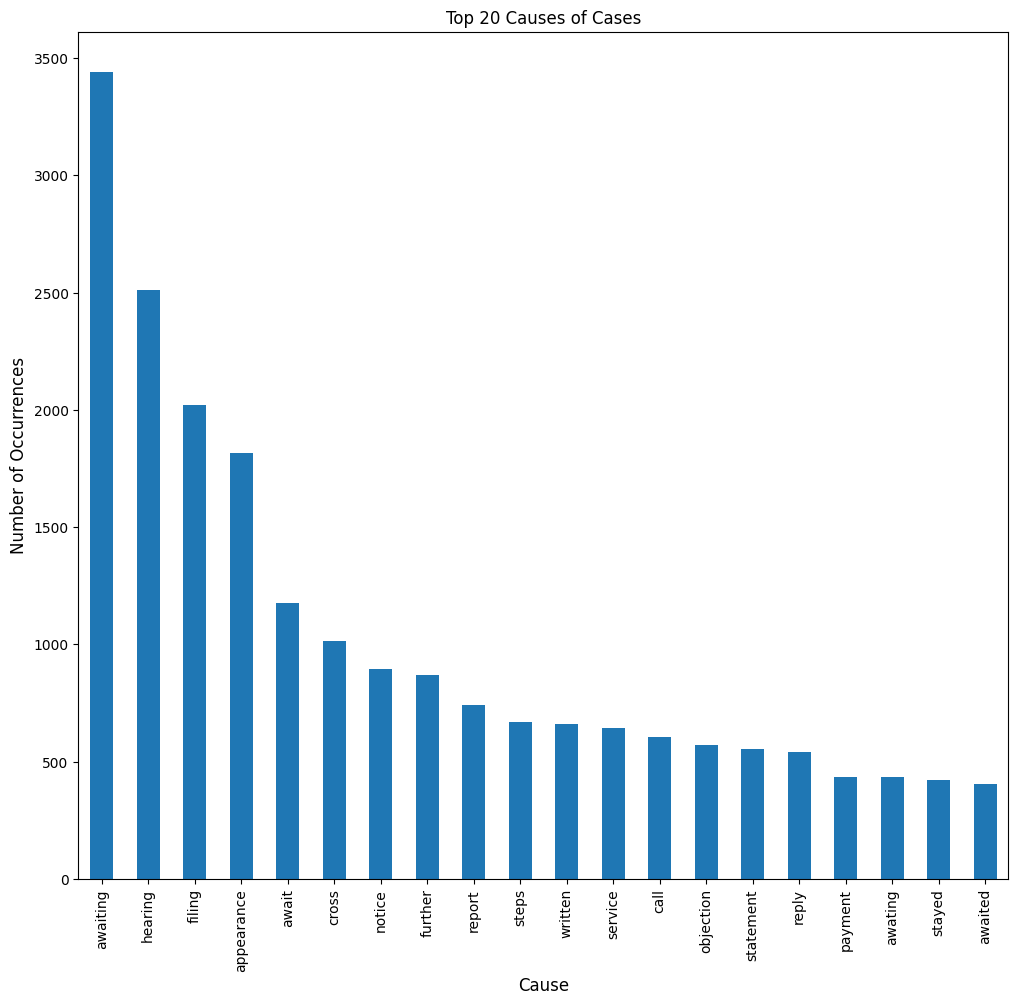

In [48]:
# Understand the cause behind most of the cases listed in the purpose_name_key csv file

df['cause'] = df['purpose_name_s'].str.split(' ').str[0]
df['cause'] = df['cause'].str.replace('[^\w\ \(\)]','')

# Trim the dataset further such that only the causes with more than 3 characters are considered
df2 = df[df['cause'].str.len() > 3]

# print(df)
# print(df2)

# Now, we try to see which is the most predominant causes of cases

print(df2['cause'].unique())
print(df2['cause'].value_counts())

# We can also visualise the top 20 results data using a bar graph

import matplotlib.pyplot as plt
import seaborn as sns

top20 = df2['cause'].value_counts()[:20]
top20.plot(kind='bar', figsize=(12,11))
plt.title('Top 20 Causes of Cases')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cause', fontsize=12)
plt.savefig('top20_causes.png')
plt.show()


In [3]:
# A similar analysis can be done for the type_name_key csv file

# Get an idea of the data in the type_name_key csv file

import pandas as pd

def get_data():
    df = pd.read_csv('type_name_key.csv') 
    return df

df = get_data()
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

# print(df2)
df = df2
print(df)

       year  type_name          type_name_s  count
0      2010        1.0             (m) t.s.     18
1      2010        2.0                 (sc)      2
2      2010        3.0           ..mact 166     97
3      2010        4.0   04 complaint cases     19
4      2010        5.0     04 criminal case     21
...     ...        ...                  ...    ...
62704  2018     7529.0      xxxxxspl t.ndps      3
62705  2018     7530.0   zila panchayat act    217
62706  2018     7531.0  zilla panchayat act     17
62707  2018     7532.0     zima 457 cr.p.c.      9
62708  2018     7533.0    zimma application     54

[62709 rows x 4 columns]


/tmp/ipykernel_557661/2974608733.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['type'] = df['type'].str.replace('[^\w\ \(\)]','')


['(m)' '(sc)' 'mact' ... 'testamentory' 'withdrawn' 'xxxxxos']
misc        3549
civil       2827
suit        1601
spl         1248
criminal     991
            ... 
gunda          1
fixed          1
eje            1
(sc)           1
xxxxxos        1
Name: type, Length: 3046, dtype: int64


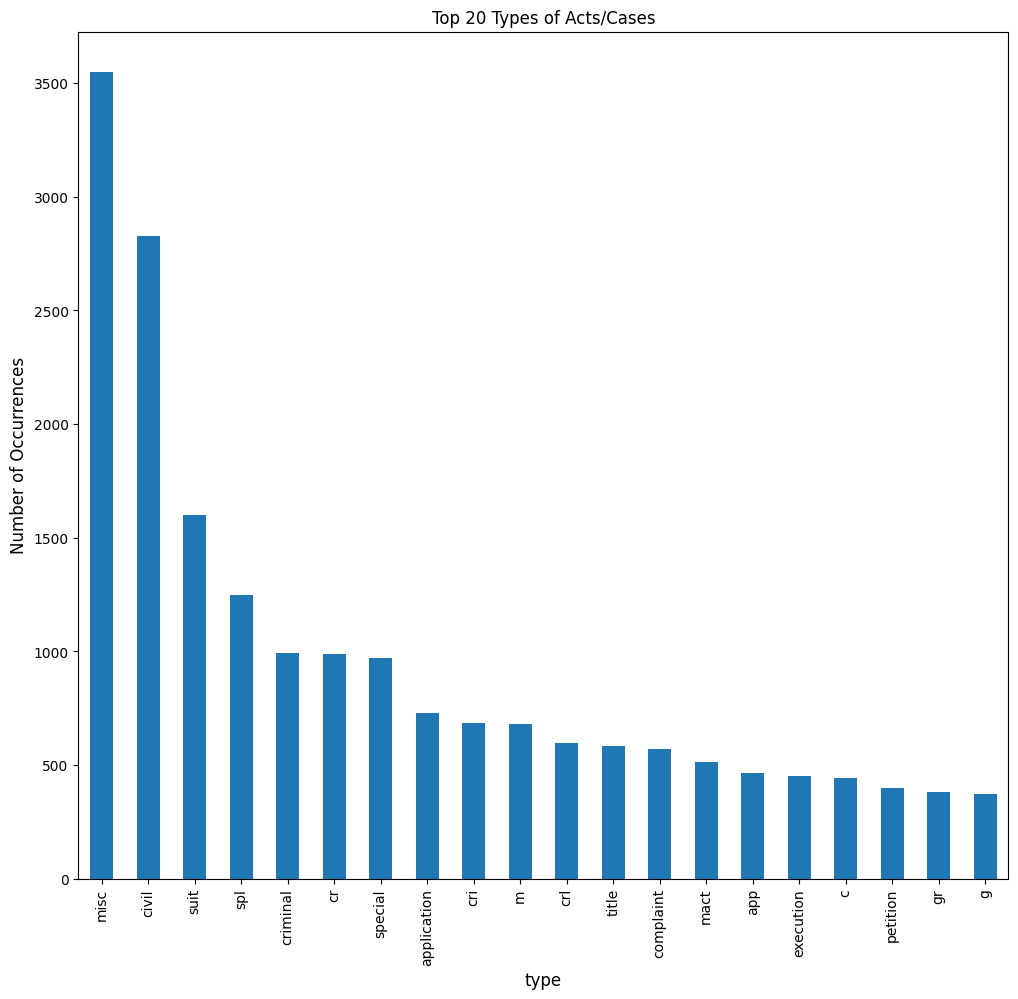

In [4]:
# Understand the cause behind most of the cases listed in the purpose_name_key csv file

df['type'] = df['type_name_s'].str.split(' ').str[0]
df['type'] = df['type'].str.replace('[^\w\ \(\)]','')

# print(df.type)

# Now, we try to see which is the most predominant type amongst acts/cases

print(df['type'].unique())
print(df['type'].value_counts())

# We can also visualise the top 20 results data using a bar graph

import matplotlib.pyplot as plt
import seaborn as sns

top20 = df['type'].value_counts()[:20]
top20.plot(kind='bar', figsize=(12,11))
plt.title('Top 20 Types of Acts/Cases')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('type', fontsize=12)
plt.savefig('top20_type.png')
plt.show()

['(sc)' 'mact' '1(c)cc' ... 'testamentory' 'withdrawn' 'xxxxxos']
misc                    3549
civil                   2827
suit                    1601
criminal                 991
special                  970
                        ... 
dmesi                      1
declarationmandatory       1
crlmcpocso                 1
crimcndpsbail              1
xxxxxos                    1
Name: type, Length: 2382, dtype: int64


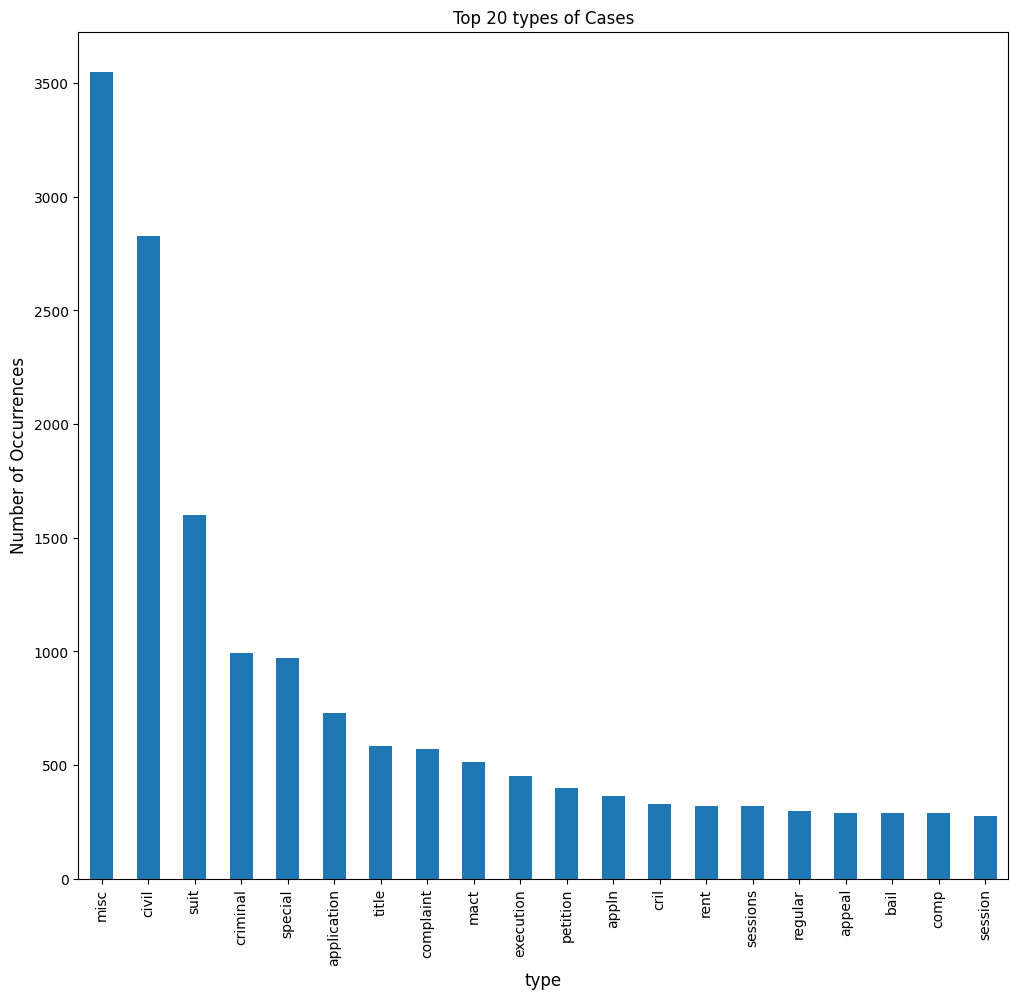

In [5]:
df2 = df[df['type'].str.len() > 3]

# print(df)
# print(df2)

# Now, we try to see which is the most predominant types of cases

print(df2['type'].unique())
print(df2['type'].value_counts())

# We can also visualise the top 20 results data using a bar graph

import matplotlib.pyplot as plt
import seaborn as sns

top20 = df2['type'].value_counts()[:20]
top20.plot(kind='bar', figsize=(12,11))
plt.title('Top 20 types of Cases')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('type', fontsize=12)
plt.savefig('top20_types2.png')
plt.show()